# Diabetes Prediction with Machine Learning

## Import Libraries

In [1]:
import pandas as pd                    # Pandas is a dataframe library
import matplotlib.pyplot as plt        # This plots the data
import numpy as np                     # numpy provides n-dimesnsional object support

# do plotting inline instead of in a separate window
%matplotlib inline

## Load and review the data

In [2]:
# Use the panda Ead CSV function and adjust path as necessary
df = pd.read_csv("./data/pima-data.csv")

In [3]:
# Observing the data read from the CSV
df.shape

(768, 10)

In [4]:
# Visual representation of some of the data read from the beginning
df.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


In [5]:
# Visual representation of some of the data read from the end
df.tail(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
763,10,101,76,48,180,32.9,0.171,63,1.8912,False
764,2,122,70,27,0,36.8,0.340,27,1.0638,False
765,5,121,72,23,112,26.2,0.245,30,0.9062,False
766,1,126,60,0,0,30.1,0.349,47,0.0000,True
767,1,93,70,31,0,30.4,0.315,23,1.2214,False


In [6]:
#Some columns need to be eliminated which can result in faulty results. These columns are usually duplicates or null values. Some of these columns can be correlated and need to be eliminated.

# check for null values in the data
df.isnull().values.any()

False

In [7]:
# To visualize correlations, we use the mathplot library

def plot_corr(df, size=11):
    """
    Function lots a graphical correlation matrix for each pair of columns in the dataframe.
    
    Input: Dataframe
    size: vertical and horizontal size of the plot
    
    Displays: matrix of correlation between columns. (Blue-green)->dark blue-> light green->yellow --> Less to more correlated
                                                     0-------------------------->1
    """
    
    # dataframe correlation function
    corr = df.corr()
    
    fig, ax = plt.subplots(figsize=(size,size))
    
    # colour code the rectangles by correlation value
    ax.matshow(corr)
    
    # draw x tick marks
    plt.xticks(range(len(corr.columns)), corr.columns)
    
    # draw y tick marks
    plt.yticks(range(len(corr.columns)), corr.columns)

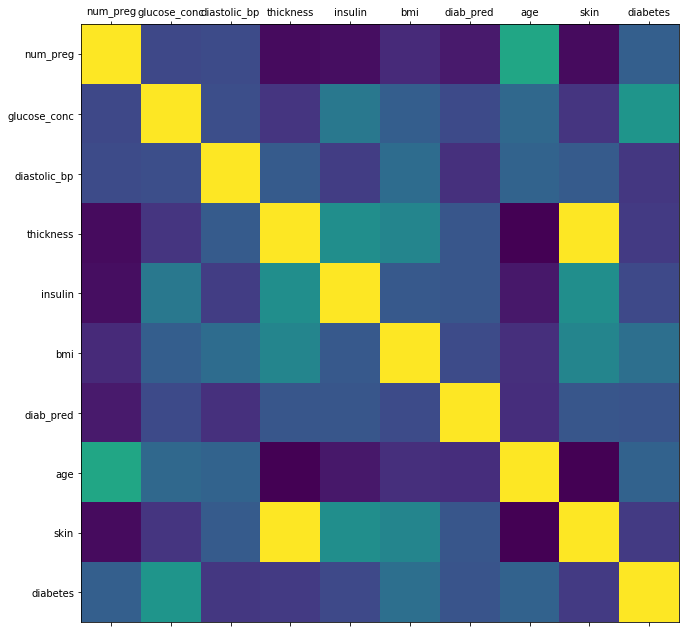

In [8]:
plot_corr(df)

In [9]:
# After running the above plot_corr() function, it can be observed that the skin and thickness columns are highly correlated. The line in the middle eas expected to be correlated since they are the same columns
# Lets check how correlated the skin and thickenss columns are:
df.corr()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
num_preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,-0.081672,0.221898
glucose_conc,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.057328,0.466581
diastolic_bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.207371,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.436783,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.392573,0.292695
diab_pred,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.183928,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,-0.113970,0.238356
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,0.074752,1.000000


In [10]:
# skin and thickness columns are positively correlated. This means that these two attributes are changing in the same proportion
# This means that it won't add any useful value to our final results so we can remove on of these columns.
#This correlation is difficult to find if we just look at both these columns directly with their raw values. (example: see the result from the df.head() function above and compare the skin and thickness columns)
# Lets drop the skin column:
del df['skin']

In [11]:
# check if the column is dropped:
df.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,True
1,1,85,66,29,0,26.6,0.351,31,False
2,8,183,64,0,0,23.3,0.672,32,True
3,1,89,66,23,94,28.1,0.167,21,False
4,0,137,40,35,168,43.1,2.288,33,True


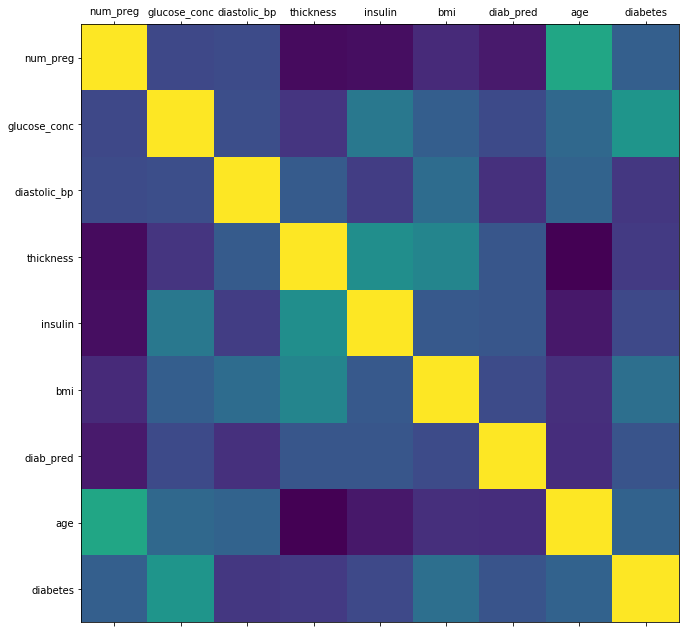

In [12]:
# now run the correlation plot again to see if there are ANY remaining correlatons:
plot_corr(df)

In [13]:
# After dropping the skin column, we noticed there are no correlations. So now we can mould the data:
# For moulding we need to ensure that the datatypes are exactly like we want them and also if we want to add any additional columns


## Moulding the Data: Check Data Types


In [14]:
# Since most algorithms work with numerical values, we would be need to change the values of the diabetes column
df.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,True
1,1,85,66,29,0,26.6,0.351,31,False
2,8,183,64,0,0,23.3,0.672,32,True
3,1,89,66,23,94,28.1,0.167,21,False
4,0,137,40,35,168,43.1,2.288,33,True


Change True to 1 and False to 0

In [15]:
# use a map to make this change
diabetes_map = {True : 1, False : 0}

df['diabetes'] = df['diabetes'].map(diabetes_map)

In [16]:
# Check if the changes are made
df.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [17]:
# To make sure that our data is useful and has a good spread of data for diabetes cases, we will check what percentage of poeple had diabetes and what percentage did not.

# number of cases with diabetes
num_true = len(df.loc[df['diabetes'] == True])
# number of cases without diabetes
num_false = len(df.loc[df['diabetes'] == False])

print("Number of True cases: {0} ({1:2.2f}%)".format(num_true, (num_true/(num_true+num_false)) * 100))
print("Number of False cases: {0} ({1:2.2f}%)".format(num_false, (num_false/(num_true+num_false)) * 100))

Number of True cases: 268 (34.90%)
Number of False cases: 500 (65.10%)


## Splitting the data

70% for training, 30% for testing

In [20]:
# SciKit has a data split method.
# Import this method first
from sklearn.cross_validation import train_test_split

feature_col_names = ['num_preg', 'glucose_conc', 'diastolic_bp', 'thickness', 'insulin', 'bmi', 'diab_pred', 'age']
predicted_class_names = ['diabetes']

# the feature columns
X = df[feature_col_names].values

# the class column which has the value to answer our question
y = df[predicted_class_names].values

# the size of the tests: 30%
split_test_size = 0.30

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_test_size, random_state=42)

Check if we have the desired 30% to 70% data split for test and training data

In [21]:
print("{0:0.2f}% in training set".format((len(X_train)/len(df.index)) * 100))
print("{0:0.2f}% in test set".format((len(X_test)/len(df.index)) * 100))

69.92% in training set
30.08% in test set


In [29]:
# This is still insufficient in proving that the data is split correctly.
# We need to check if the predicted value (diabetes column value) was split evenly as well

print("Original True: {0} ({1:0.2f}%)".format(len(df.loc[df['diabetes'] == 1]) , (len(df.loc[df['diabetes'] == 1])/len(df.index) * 100)))
print("Original False: {0} ({1:0.2f}%)".format(len(df.loc[df['diabetes'] == 0]) , (len(df.loc[df['diabetes'] == 0])/len(df.index) * 100)))
print("")

print("Training True: {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]) , (len(y_train[y_train[:] == 1])/len(y_train) * 100)))
print("Training False: {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]) , (len(y_train[y_train[:] == 0])/len(y_train) * 100)))
print("")

print("Training True: {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]) , (len(y_test[y_test[:] == 1])/len(y_test) * 100)))
print("Training True: {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]) , (len(y_test[y_test[:] == 0])/len(y_test) * 100)))

Original True: 268 (34.90%)
Original False: 500 (65.10%)

Training True: 188 (35.01%)
Training False: 349 (64.99%)

Training True: 80 (34.63%)
Training True: 151 (65.37%)


In [30]:
# Check if there are any missing or null values after splitting the data. These null values can be hidden

df.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


The thickness in row 2 is 0 and that is a null value since logically speaking, thickness cannot be 0. This has to be checked
for all the columns now.

In [34]:
print ("Number of rows in Dataframe {0}".format(len(df)))
print("# of missing glucose_conc: {0}".format(len(df.loc[df['glucose_conc'] == 0])))
print("# of missing diastolic_bp: {0}".format(len(df.loc[df['diastolic_bp'] == 0])))
print("# of missing thickness: {0}".format(len(df.loc[df['thickness'] == 0])))
print("# of missing insulin: {0}".format(len(df.loc[df['insulin'] == 0])))
print("# of missing bmi: {0}".format(len(df.loc[df['bmi'] == 0])))
print("# of missing diab_pred: {0}".format(len(df.loc[df['diab_pred'] == 0])))
print("# of missing age: {0}".format(len(df.loc[df['age'] == 0])))

Number of rows in Dataframe 768
# of missing glucose_conc: 5
# of missing diastolic_bp: 35
# of missing thickness: 227
# of missing insulin: 374
# of missing bmi: 11
# of missing diab_pred: 0
# of missing age: 0


Now we need to determine which rows could be an issue. Medical Expertise (and a google search) suggests that insulin can be 0.
For the others, we have 2 options, either we ignore the rows (we can't do that because that will result in loss of training data, around 50%), or we can IMPUTE new values by using mean median or mode of a column.
In this case, we will use the mean of the column and leverage the python libraries.                                                             

In [36]:
# Impute with mean
# Import the imputer class
from sklearn.preprocessing import Imputer

# impute with mean all the 0 readings
fill_0 = Imputer(missing_values=0, strategy="mean", axis=0)

# re-initialize the training and test data arrays
X_train = fill_0.fit_transform(X_train)
X_test = fill_0.fit_transform(X_test)


## Training with the Naive Bayes Algorithm

In [37]:
from sklearn.naive_bayes import GaussianNB

# create gaussian naive bayes model and train it with the data
nb_model = GaussianNB()

nb_model.fit(X_train, y_train.ravel())


GaussianNB(priors=None)

## Performance on the training Data

In [38]:
# predict the values using the training data
nb_predict_train = nb_model.predict(X_train)

# import the performance metrics library
from sklearn import metrics

#Accuracy of results:
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, nb_predict_train)))
print()

Accuracy: 0.7542



## Performance on the testing data

In [39]:
# predict the values using the testing data
nb_predict_test = nb_model.predict(X_test)

# import the performance metrics library
from sklearn import metrics

#Accuracy of results:
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, nb_predict_test)))
print()

Accuracy: 0.7359



#### Metrics

In [41]:
# Get the confusion matrix to understand metrics

print("Confusion Matix")
print("{0}".format(metrics.confusion_matrix(y_test, nb_predict_test)))
print("")

print("Classification Report")
print(metrics.classification_report(y_test, nb_predict_test))

Confusion Matix
[[118  33]
 [ 28  52]]

Classification Report
             precision    recall  f1-score   support

          0       0.81      0.78      0.79       151
          1       0.61      0.65      0.63        80

avg / total       0.74      0.74      0.74       231



In the confusion matrix, the left column is predicted to be FALSE (0) and the right one is TRUE(1). The rows denote the actual values; the top row is FALSE (0) and the Bottom row is TRUE(1).
So Top left element is basically: Actually not diabeties and PREDICTED to NOT be diabeties as well.
Top right element: Actually not diabeties and PREDICTED to BE diabeties.
Bottom left element: Actually diabeities and predicted to be NOT diabeities
Bottom right element: Actually diabeties and predicted to BE diabeities.

Recall for bottom right is basically the rate of HOW often the model is predicting diabeties when the prediction is actually diabeties. Hence (52/(38+52))

Precision of bottom right is basically the rate when a patient would have diabeities and the model also predicted diabeties.
Hence (52/(52+33))

In [42]:
## To fix the recall and precision, to be above 70%, we can employ another algorithm, namelt the Random Forest Model

## Random Forest

In [44]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)

rf_model.fit(X_train, y_train.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

## Predict the Training data with Random Forest

In [45]:
rf_predict_train = rf_model.predict(X_train)

#Accuracy of results:
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, rf_predict_train)))
print()

Accuracy: 0.9870



## Performance on the test data with Random Forest

In [46]:
# predict the values using the testing data
rf_predict_test = rf_model.predict(X_test)

#Accuracy of results:
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, rf_predict_test)))
print()

Accuracy: 0.7100



#### Metrics

In [47]:
# Get the confusion matrix to understand metrics

print("Confusion Matix")
print("{0}".format(metrics.confusion_matrix(y_test, rf_predict_test)))
print("")

print("Classification Report")
print(metrics.classification_report(y_test, rf_predict_test))

Confusion Matix
[[121  30]
 [ 37  43]]

Classification Report
             precision    recall  f1-score   support

          0       0.77      0.80      0.78       151
          1       0.59      0.54      0.56        80

avg / total       0.70      0.71      0.71       231



As observed, the training data accuracy is near perfect but the test data accuracy is worse compared to Bayes algorithm. The precision and recall has also reduced significantly. Whenever this happens (when training data accuracy is super high), we can assume that the model has overfitted the data, i.e, it has learnt the training data too well.

There are 4 main approaches now:

- Adjust current algorithm
- Get more data or improve data
- Improve training
- Switch Algorithms

## Logistic Regression Algorithm

In [53]:
# Use this algorithm since it has a parameter for shifting the balance between YES and NO cases.
# In our scenario, there are 65% YES cases and 35% NO cases which might be causing the issue.

from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(C=0.4,class_weight="balanced", random_state=42)
lr_model.fit(X_train, y_train.ravel())

# predict the values using the testing data
lr_predict_test = lr_model.predict(X_test)

#Accuracy of results:
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, lr_predict_test)))
print()

# Get the confusion matrix to understand metrics

print("Confusion Matix")
print("{0}".format(metrics.confusion_matrix(y_test, lr_predict_test)))
print("")

print("Classification Report")
print(metrics.classification_report(y_test,lr_predict_test))

Accuracy: 0.7143

Confusion Matix
[[106  45]
 [ 21  59]]

Classification Report
             precision    recall  f1-score   support

          0       0.83      0.70      0.76       151
          1       0.57      0.74      0.64        80

avg / total       0.74      0.71      0.72       231



This is what we needed, but there can be other algorithms utilized. Basically, our results were affected by test data and because of that we had to change our algorithms. Basically, there should be more data or VALIDATION data in place to check that our training data is consistent and does not effect the final test data. This is known as Cross Validation and is implemented with the K-Fold Cross Validation method. This is in-built on most algorithms and can be demonstrated as follows:


## LogisticRegressionCV Algorithm

In [54]:
from sklearn.linear_model import LogisticRegressionCV

lr_cv_model = LogisticRegressionCV(n_jobs=-1, random_state=42, Cs=3, cv=10, refit=False, class_weight="balanced")
lr_cv_model.fit(X_train, y_train.ravel())

# predict the values using the testing data
lr_cv_predict_test = lr_cv_model.predict(X_test)

#Accuracy of results:
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, lr_cv_predict_test)))
print()

# Get the confusion matrix to understand metrics

print("Confusion Matix")
print("{0}".format(metrics.confusion_matrix(y_test, lr_cv_predict_test)))
print("")

print("Classification Report")
print(metrics.classification_report(y_test,lr_cv_predict_test))

Accuracy: 0.7013

Confusion Matix
[[108  43]
 [ 26  54]]

Classification Report
             precision    recall  f1-score   support

          0       0.81      0.72      0.76       151
          1       0.56      0.68      0.61        80

avg / total       0.72      0.70      0.71       231



Done
/.AZ